In [2]:
## importing essential libraries

import nltk
nltk.download('wordnet')  # This line ensures that WordNet is downloaded
nltk.download('stopwords')  # Ensures stopwords are downloaded

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Importing Data
df = pd.read_csv("/content/drive/MyDrive/Hotel_Reviews/Hotel_Reviews.csv")

In [4]:
# Checking the sample data
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
#checking null values
df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [6]:
#dropping null values
df.dropna(inplace=True,axis=0)

In [7]:
# Combine positive and negative reviews into one column
df['review'] = df['Negative_Review'] + " " + df['Positive_Review']
df['review'] = df['review'].str.strip()

In [8]:
## Data Processing
# Simple preprocessing to remove whitespace and special charectors
df['review'] = df['review'].str.lower().str.replace('[^\w\s]', '')

# Remove stopwords in english
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


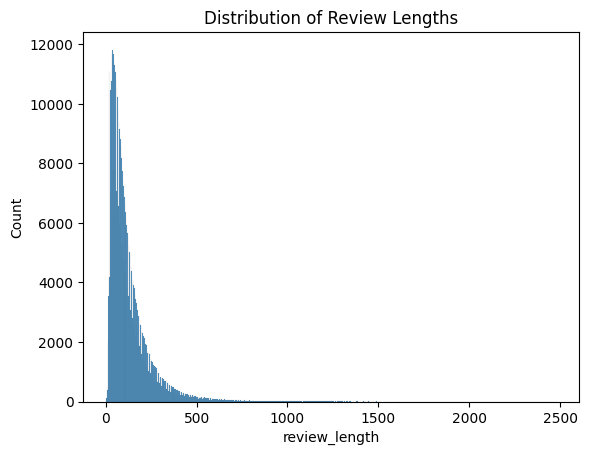

In [9]:
# Visualize the length of reviews
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'])
plt.title('Distribution of Review Lengths')
plt.show()

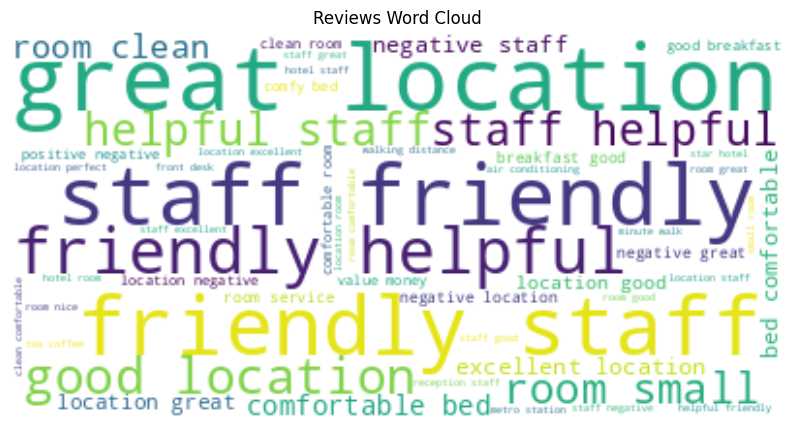

In [ ]:
# Word cloud for reviews
wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white").generate(' '.join(df['review']))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,
           interpolation='bilinear')
plt.axis('off')
plt.title('Reviews Word Cloud')
plt.show()

In [ ]:
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,review_length
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,angry made post available via possible site us...,1114
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,negative real complaint hotel great great loca...,464
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,room nice elderly bit difficult room two story...,191
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,room dirty afraid walk barefoot floor looked c...,809
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,booked company line showed picture room though...,443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,trolly staff help take luggage room location,44
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,hotel look like 3 surely 4 breakfast ok got ea...,57
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,ac useless hot week vienna gave hot air positive,48
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,negative room enormous really comfortable beli...,83


In [ ]:
#Identifing the top Positive reviews
text = " ".join(df[df["Reviewer_Score"] >= 10]["Positive_Review"])
wordcloud = WordCloud(width=1200,
                      height=600).generate(text)
fig = px.imshow(wordcloud,
                title="WordCloud of Positive Reviews")

fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

In [ ]:
text = " ".join(df[df["Reviewer_Score"] >= 10]["Negative_Review"])
wordcloud = WordCloud(width=1200,
                      height=600).generate(text)
fig = px.imshow(wordcloud,
                title="WordCloud of Positive Reviews")

fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

In [10]:
# Define the sentiment based on some criteria, for simplicity let's assume it's available in 'Reviewer_Score'
df['sentiment'] = df['Reviewer_Score'].apply(lambda score: 'positive' if score > 5 else 'negative')


In [11]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

In [12]:
# Feature extraction
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Model Training using default
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Initial Evaluation parameter as default
predictions = rf.predict(X_test_tfidf)
print(classification_report(y_test, predictions))
print("Initial accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.70      0.03      0.05      9231
    positive       0.94      1.00      0.97    144510

    accuracy                           0.94    153741
   macro avg       0.82      0.51      0.51    153741
weighted avg       0.93      0.94      0.91    153741

Initial accuracy: 0.9408615788891708


In [13]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'criterion' :['gini', 'entropy']
}



In [ ]:
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train_tfidf, y_train)
print("Best Parameters:", CV_rf.best_params_)


In [ ]:
# Evaluate the best model
best_rf = CV_rf.best_estimator_
predictions_best = best_rf.predict(X_test_tfidf)
print(classification_report(y_test, predictions_best))
print("Accuracy after tuning:", accuracy_score(y_test, predictions_best))